# AdS Poincaré horizon as a degenerate Killing horizon

This notebook demonstrates some capabilities of [SageMath](https://www.sagemath.org/) in computations regarding the Poincaré horizon of the 4-dimensional anti-de Sitter spacetime. It also provides computations and figures for Example 17 of Chap. 3 of the lecture notes [Geometry and physics of black holes](https://luth.obspm.fr/~luthier/gourgoulhon/bh16/). 

The corresponding tools have been developed within the  [SageManifolds](https://sagemanifolds.obspm.fr) project.

In [1]:
version()

'SageMath version 9.5.beta1, Release Date: 2021-09-13'

First we set up the notebook to display mathematical objects using LaTeX rendering and we ask for running tensor computations in parallel on 8 threads:

In [2]:
%display latex
Parallelism().set(nproc=8)

## Spacetime manifold

We declare the anti-de Sitter spacetime as a 4-dimensional Lorentzian manifold:

In [3]:
M = Manifold(4, 'M', latex_name=r'\mathscr{M}', structure='Lorentzian')
print(M)
M

4-dimensional Lorentzian manifold M


4-dimensional Lorentzian manifold M

and endow it with the **conformal coordinates** $(\tau, \chi, \theta,\phi)$
(cf. the generic [anti-de Sitter notebook](https://nbviewer.jupyter.org/github/sagemanifolds/SageManifolds/blob/master/Notebooks/SM_anti_de_Sitter.ipynb)):

In [4]:
X_conf.<ta,ch,th,ph> = M.chart(r'ta:\tau ch:(0,pi/2):\chi th:(0,pi):\theta ph:(0,2*pi):periodic:\phi')
print(X_conf)
X_conf

Chart (M, (ta, ch, th, ph))


Chart (M, (ta, ch, th, ph))

In [5]:
X_conf.coord_range()

ta: (-oo, +oo); ch: (0, 1/2*pi); th: (0, pi); ph: [0, 2*pi] (periodic)

### Spacetime metric

First of all, we declare the AdS length scale $\ell$ as a symbolic variable:

In [6]:
var('l', latex_name=r'\ell', domain='real')
assume(l>0)

Then we define the metric tensor $g$ by providing its nonzero components:

In [7]:
g = M.metric()
g[0,0] = -l^2/cos(ch)^2
g[1,1] = l^2/cos(ch)^2
g[2,2] = l^2/cos(ch)^2*sin(ch)^2
g[3,3] = l^2/cos(ch)^2*sin(ch)^2*sin(th)^2
g.display()

g = -l^2/cos(ch)^2 dta⊗dta + l^2/cos(ch)^2 dch⊗dch + l^2*sin(ch)^2/cos(ch)^2 dth⊗dth + l^2*sin(ch)^2*sin(th)^2/cos(ch)^2 dph⊗dph

Let us check that $g$ is a solution of the vaccum **Einstein equation** with the cosmological constant
$\Lambda = - 3 /\ell^2$:

In [8]:
Ric = g.ricci()
R = g.ricci_scalar()
Lambda = -3/l^2

Ric - 1/2*R*g + Lambda*g == 0

True

## Poincaré patch

The **Poincaré patch** is the open subset $\mathscr{M}_{\rm P}$ of $\mathscr{M}$ defined by
$$ \cos\tau - \sin\chi \sin\theta \cos\phi > 0 \quad\mbox{and}\quad -\pi < \tau < \pi.$$
Hence we declare it as

In [9]:
MP = M.open_subset('MP', latex_name=r'\mathscr{M}_{\rm P}', 
                   coord_def={X_conf: [cos(ta) - sin(ch)*sin(th)*cos(ph)>0, ta>-pi, ta<pi]})
print(MP)
MP

Open subset MP of the 4-dimensional Lorentzian manifold M


Open subset MP of the 4-dimensional Lorentzian manifold M

We introduce the **Poincaré coordinates** $(t,x,y,u)$ on $\mathscr{M}_{\rm P}$ as

In [10]:
X_Poinc.<t,x,y,u> = MP.chart('t x y u:(0,+oo)')
X_Poinc

Chart (MP, (t, x, y, u))

In [11]:
X_Poinc.coord_range()

t: (-oo, +oo); x: (-oo, +oo); y: (-oo, +oo); u: (0, +oo)

The Poincaré coordinates are defined by their link to the conformal coordinates, which we declare via the method `transition_map` on the restriction of the conformal coordinates to $\mathscr{M}_{\rm P}$, `X_conf.restrict(MP)`:

In [12]:
conf_to_Poinc = X_conf.restrict(MP).transition_map(X_Poinc, 
                            [l*sin(ta)/(cos(ta) - sin(ch)*sin(th)*cos(ph)),
                             l*sin(ch)*sin(th)*sin(ph)/(cos(ta) - sin(ch)*sin(th)*cos(ph)),
                             l*sin(ch)*cos(th)/(cos(ta) - sin(ch)*sin(th)*cos(ph)),
                             l*(cos(ta) - sin(ch)*sin(th)*cos(ph))/cos(ch)])
conf_to_Poinc.display()

t = -l*sin(ta)/(cos(ph)*sin(ch)*sin(th) - cos(ta))
x = -l*sin(ch)*sin(ph)*sin(th)/(cos(ph)*sin(ch)*sin(th) - cos(ta))
y = -l*cos(th)*sin(ch)/(cos(ph)*sin(ch)*sin(th) - cos(ta))
u = -(cos(ph)*sin(ch)*sin(th) - cos(ta))*l/cos(ch)

In order to help SageMath with simplifications, we explicitly set some assumptions:

In [13]:
assume(sin(ch)>0, sin(th)>0)
assume(cos(ta) - sin(ch)*sin(th)*cos(ph)>0)

We provide the inverse of the coordinate change $(\tau,\chi,\theta,\phi) \mapsto (t,x,y,u)$ by means of the method `set_inverse`:

In [14]:
conf_to_Poinc.set_inverse(atan2(2*l*t, x^2+y^2-t^2+l^2*(1+l^2/u^2)),
            acos(2*l^3/u/sqrt((x^2+y^2-t^2+l^2*(1+l^2/u^2))^2 + 4*l^2*t^2)),
            acos(2*l*y/sqrt((x^2+y^2-t^2+l^2*(1+l^2/u^2))^2
                                                    + 4*l^2*(t^2-l^4/u^2))),
            atan2(2*l*x, x^2+y^2-t^2-l^2*(1-l^2/u^2)))          

Check of the inverse coordinate transformation:
  ta == -arctan2(2*l^2*sin(ta)/(cos(ph)*sin(ch)*sin(th) - cos(ta)), -2*l^2*cos(ta)/(cos(ph)*sin(ch)*sin(th) - cos(ta)))  **failed**
  ch == ch  *passed*
  th == th  *passed*
  ph == -arctan2(2*l^2*sin(ch)*sin(ph)*sin(th)/(cos(ph)*sin(ch)*sin(th) - cos(ta)), -2*l^2*cos(ph)*sin(ch)*sin(th)/(cos(ph)*sin(ch)*sin(th) - cos(ta)))  **failed**
  t == t  *passed*
  x == x  *passed*
  y == y  *passed*
  u == u  *passed*
NB: a failed report can reflect a mere lack of simplification.


In [15]:
conf_to_Poinc.inverse().display()

ta = arctan2(2*l*t, l^2*(l^2/u^2 + 1) - t^2 + x^2 + y^2)
ch = arccos(2*l^3/(sqrt(4*l^2*t^2 + (l^2*(l^2/u^2 + 1) - t^2 + x^2 + y^2)^2)*u))
th = arccos(2*l*y/sqrt(4*(t^2 - l^4/u^2)*l^2 + (l^2*(l^2/u^2 + 1) - t^2 + x^2 + y^2)^2))
ph = arctan2(2*l*x, l^2*(l^2/u^2 - 1) - t^2 + x^2 + y^2)

We note that the Jacobian of the coordinate change is quite involved:

In [16]:
conf_to_Poinc.jacobian()

[                   -(l*cos(ph)*cos(ta)*sin(ch)*sin(th) - l)/(cos(ph)^2*sin(ch)^2*sin(th)^2 - 2*cos(ph)*cos(ta)*sin(ch)*sin(th) + cos(ta)^2)                           l*cos(ch)*cos(ph)*sin(ta)*sin(th)/(cos(ph)^2*sin(ch)^2*sin(th)^2 - 2*cos(ph)*cos(ta)*sin(ch)*sin(th) + cos(ta)^2)                           l*cos(ph)*cos(th)*sin(ch)*sin(ta)/(cos(ph)^2*sin(ch)^2*sin(th)^2 - 2*cos(ph)*cos(ta)*sin(ch)*sin(th) + cos(ta)^2)                          -l*sin(ch)*sin(ph)*sin(ta)*sin(th)/(cos(ph)^2*sin(ch)^2*sin(th)^2 - 2*cos(ph)*cos(ta)*sin(ch)*sin(th) + cos(ta)^2)]
[                          l*sin(ch)*sin(ph)*sin(ta)*sin(th)/(cos(ph)^2*sin(ch)^2*sin(th)^2 - 2*cos(ph)*cos(ta)*sin(ch)*sin(th) + cos(ta)^2)                           l*cos(ch)*cos(ta)*sin(ph)*sin(th)/(cos(ph)^2*sin(ch)^2*sin(th)^2 - 2*cos(ph)*cos(ta)*sin(ch)*sin(th) + cos(ta)^2)                           l*cos(ta)*cos(th)*sin(ch)*sin(ph)/(cos(ph)^2*sin(ch)^2*sin(th)^2 - 2*cos(ph)*cos(ta)*sin(ch)*sin(th) + cos(ta)^2) (l*cos(ph)*cos(ta)*sin(ch)*sin(th) - l*sin(ch)^2*sin(th)^2)/(cos(ph)^2*sin(ch)^2*sin(th)^2 - 2*cos(ph)*cos(ta)*sin(ch)*sin(th) + cos(ta)^2)]
[                                  l*cos(th)*sin(ch)*sin(ta)/(cos(ph)^2*sin(ch)^2*sin(th)^2 - 2*cos(ph)*cos(ta)*sin(ch)*sin(th) + cos(ta)^2)                                   l*cos(ch)*cos(ta)*cos(th)/(cos(ph)^2*sin(ch)^2*sin(th)^2 - 2*cos(ph)*cos(ta)*sin(ch)*sin(th) + cos(ta)^2)           (l*cos(ph)*sin(ch)^2 - l*cos(ta)*sin(ch)*sin(th))/(cos(ph)^2*sin(ch)^2*sin(th)^2 - 2*cos(ph)*cos(ta)*sin(ch)*sin(th) + cos(ta)^2)                        -l*cos(th)*sin(ch)^2*sin(ph)*sin(th)/(cos(ph)^2*sin(ch)^2*sin(th)^2 - 2*cos(ph)*cos(ta)*sin(ch)*sin(th) + cos(ta)^2)]
[                                                                                                                         -l*sin(ta)/cos(ch)                                                                                           (l*cos(ta)*sin(ch) - l*cos(ph)*sin(th))/cos(ch)^2                                                                                                          -l*cos(ph)*cos(th)*sin(ch)/cos(ch)                                                                                                           l*sin(ch)*sin(ph)*sin(th)/cos(ch)]

### Plot of the Poincaré coordinate grid in terms of the conformal coordinates $(\tau,\chi)$

For plotting purposes, we introduce the 2-dimensional plane $\mathbb{R}^2$, spanned by
Cartesian coordinates $(\tau, x_\chi)$:

In [17]:
R2 = Manifold(2, 'R^2', latex_name=r'\mathbb{R}^2')
X2.<ta, x_ch> = R2.chart(r'ta:\tau x_ch:x_\chi')
X2

Chart (R^2, (ta, x_ch))

and define the following map from AdS spacetime to $\mathbb{R}^2$:

In [18]:
Phi = M.diff_map(R2, {(X_conf, X2): [ta, ch*cos(ph)]})
Phi.display()

M → R^2
   (ta, ch, th, ph) ↦ (ta, x_ch) = (ta, ch*cos(ph))

Let us the grid of coordinates $(t,u)$ for $(x,y)=(0,0)$ in terms of the coordinates $(\tau,\chi)$. This is achieved by using the method `plot` on the chart `X_Poinc`:

In [19]:
graph1 = X_Poinc.plot(X2, ambient_coords=(x_ch, ta), mapping=Phi.restrict(MP),
                      fixed_coords={x: 0, y: 0}, 
                      ranges={t: (-15, 15), u: (0.01, 12)}, parameters={l: 1},
                      color={t: 'red', u: 'grey'}, number_values={t: 33, u: 25}, 
                      plot_points=200)

We superpose the plot of the Poincaré horizon and a few labels:

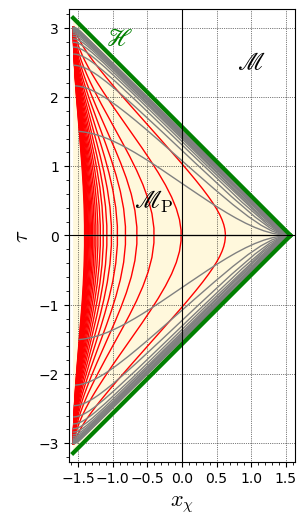

In [20]:
graph = polygon([(-pi/2, -pi), (pi/2, 0), (-pi/2, pi)], color='cornsilk')
graph += graph1
graph_hor = plot(pi/2 - ch, (ch, -pi/2, pi/2), color='green',
                 thickness=3) \
           + plot(ch - pi/2, (ch, -pi/2, pi/2), color='green',
                  thickness=3) \
           + text(r'$\mathscr{H}$', (-0.9, 2.85), fontsize=18, color='green')
graph += graph_hor
region_labels = text(r'$\mathscr{M}$', (1, 2.5), fontsize=18, color='black') \
                + text(r'$\mathscr{M}_{\rm P}$', (-0.4, 0.5), fontsize=18, 
                       color='black')
graph += region_labels

show(graph, frame=True, gridlines=True, figsize=8)
graph.save('neh_AdS_Poincare_patch.pdf', frame=True, 
           gridlines=True, figsize=8)

## Metric tensor in terms of Poincaré coordinates 

The computation of the metric components with respect to Poincaré coordinates is triggered by the method `display` when it receives the Poincaré chart `X_Poinc` as an argument:

In [21]:
g.display(X_Poinc)

g = -u^2/l^2 dt⊗dt + u^2/l^2 dx⊗dx + u^2/l^2 dy⊗dy + l^2/u^2 du⊗du

## Killing vector $\xi$

Since the above components of $g$ do not depend of $t$, the coordinate vector $\displaystyle\frac{\partial}{\partial t}$ is clearly a Killing vector of $(\mathscr{M}_{\rm P}, g)$. Its expression in terms the conformal coordinates is

In [22]:
vt = X_Poinc.frame()[0]
vt.display()

∂/∂t = -(cos(ph)*cos(ta)*sin(ch)*sin(th) - 1)/l ∂/∂ta - cos(ch)*cos(ph)*sin(ta)*sin(th)/l ∂/∂ch - cos(ph)*cos(th)*sin(ta)/(l*sin(ch)) ∂/∂th + sin(ph)*sin(ta)/(l*sin(ch)*sin(th)) ∂/∂ph

Let us check that $\xi$ is indeed a Killing vector of $(\mathcal{M}_{\rm P}, g)$:

In [23]:
g.restrict(MP).lie_derivative(vt).display()

0

We note that the components of $\partial/\partial t$ with respect to conformal coordinates are smooth functions
of $(\tau,\chi,\theta,\phi)$ that can be extended beyond $\mathscr{M}_{\rm P}$. We may therefore extend $\partial/\partial t$ to a vector field $\xi$ defined on the entire AdS spacetime $\mathscr{M}$:

In [24]:
xi = M.vector_field([vt[i].expr() for i in M.irange()], 
                    name='xi', latex_name=r'\xi')
xi.display()

xi = -(cos(ph)*cos(ta)*sin(ch)*sin(th) - 1)/l ∂/∂ta - cos(ch)*cos(ph)*sin(ta)*sin(th)/l ∂/∂ch - cos(ph)*cos(th)*sin(ta)/(l*sin(ch)) ∂/∂th + sin(ph)*sin(ta)/(l*sin(ch)*sin(th)) ∂/∂ph

Let us check that the restriction of $\xi$ to $\mathscr{M}_{\rm P}$ coincides with $\partial/\partial t$:

In [25]:
xi.restrict(MP).display(X_Poinc)

xi = ∂/∂t

$\xi$ is a global Killing vector:

In [26]:
g.lie_derivative(xi).display()

0

Another view of the same property by forming the **Killing equation** $\nabla_a \xi_b + \nabla_b \xi_a = 0$:

In [27]:
nabla = g.connection()

nabla(xi.down(g)).symmetrize().display()

0

### Plot of $\xi$

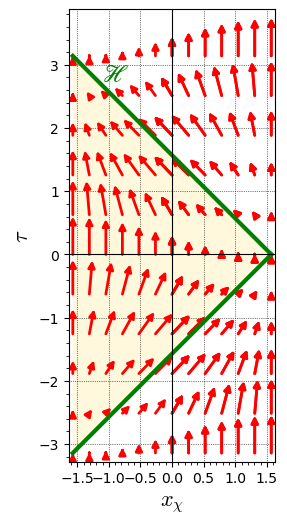

In [28]:
graph = polygon([(-pi/2, -pi), (pi/2, 0), (-pi/2, pi)], color='cornsilk')

graph += xi.plot(X2, ambient_coords=(x_ch, ta), mapping=Phi,
                 fixed_coords={th: pi/2}, parameters={l: 1},
                 ranges={ta: (-pi, pi)}, number_values={ta: 11, ch: 7, ph: 3},
                 color='red', scale=0.3, arrowsize=2)

graph += graph_hor
show(graph, frame=True, gridlines=True, figsize=8, aspect_ratio=1)
graph.save("neh_AdS_Killing_vec.pdf", frame=True, gridlines=True, 
           figsize=8, aspect_ratio=1)

## $u$ as a scalar field on the whole AdS spacetime

The expression of the Poincaré coordinate $u$ in terms of the conformal coordinates $(\tau,\chi,\theta,\phi)$
is read as the last component (index `3`) of the coordinate transformation `conf_to_Poinc`, which 
implements $(\tau,\chi,\theta,\phi)\mapsto (t,x,y,u)$:

In [29]:
conf_to_Poinc(ta, ch, th, ph)

(-l*sin(ta)/(cos(ph)*sin(ch)*sin(th) - cos(ta)),
 -l*sin(ch)*sin(ph)*sin(th)/(cos(ph)*sin(ch)*sin(th) - cos(ta)),
 -l*cos(th)*sin(ch)/(cos(ph)*sin(ch)*sin(th) - cos(ta)),
 -(l*cos(ph)*sin(ch)*sin(th) - l*cos(ta))/cos(ch))

In [30]:
conf_to_Poinc(ta, ch, th, ph)[3]

-(l*cos(ph)*sin(ch)*sin(th) - l*cos(ta))/cos(ch)

This expression being regular in all $\mathscr{M}$, we may extend $u$ to a scalar field defined on $\mathscr{M}$ by

In [31]:
U = M.scalar_field(conf_to_Poinc(ta, ch, th, ph)[3], name='u')
U.display()

u: M → ℝ
   (ta, ch, th, ph) ↦ -(l*cos(ph)*sin(ch)*sin(th) - l*cos(ta))/cos(ch)
on MP: (t, x, y, u) ↦ u

## The Poincaré horizon as the submanifold $u=0$

The **Poincaré horizon** 
is the hypersurface $\mathscr{H}$ bounding the Poincaré patch $\mathscr{M}_{\rm P}$ in 
$\mathscr{M}$. It follows that $\mathscr{H}$ is the level set $u=0$ within the region $-\pi<\tau<\pi$.
$\mathscr{H}$ has actually two connected components: one for $-\pi < \tau < 0$ and the other one
for $0 < \tau <\pi$. In what follows, we focus on the connected component that has $0 < \tau <\pi$; we define
it as a submanifold of $\mathscr{M}$, by means of the keyword `ambient` in the function `Manifold`:

In [32]:
H = Manifold(3, 'H', ambient=M, latex_name=r'\mathscr{H}')
print(H)

3-dimensional differentiable submanifold H immersed in the 4-dimensional Lorentzian manifold M


We consider that $\mathscr{H}$ is spanned by the coordinates $(\chi,\theta,\phi)$, so that we declare the following 
chart:

In [33]:
XH.<ch,th,ph> = H.chart(r'ch:(0,pi/2):\chi th:(0,pi):\theta ph:(0,2*pi):periodic:\phi')
XH

Chart (H, (ch, th, ph))

The **embedding $F$ of** $\mathscr{H}$ **into** $\mathscr{M}$ is easily defined in the pair of charts
`(XH, X_conf)` by noticing that, for $0 < \tau <\pi$,  $u=0 \iff \tau = \arccos(\sin\chi\sin\theta\cos\phi)$:

In [34]:
F = H.diff_map(M, {(XH, X_conf): (acos(sin(ch)*sin(th)*cos(ph)), ch, th, ph)},
               name='F')
F.display()

F: H → M
   (ch, th, ph) ↦ (ta, ch, th, ph) = (arccos(cos(ph)*sin(ch)*sin(th)), ch, th, ph)

We declare that $F$ is the embedding of $\mathscr{H}$ into $\mathscr{M}$, thereby ending the definition of $\mathscr{H}$:

In [35]:
H.set_embedding(F)
print(H)

3-dimensional differentiable submanifold H embedded in the 4-dimensional Lorentzian manifold M


We may check that the scalar field $u$ is zero on $\mathscr{H}$ by considering the pullback of $u$ by $F$:

In [36]:
FU = F.pullback(U)
print(FU)

Scalar field F^*(u) on the 3-dimensional differentiable submanifold H embedded in the 4-dimensional Lorentzian manifold M


In [37]:
FU.display()

F^*(u): H → ℝ
   (ch, th, ph) ↦ 0

### Null character of the hypersurface $\mathscr{H}$

The metric induced by $g$ on $\mathscr{H}$ is obtained as the pullback of $g$ by the embedding $F$:

In [38]:
Fg = F.pullback(g)
print(Fg)

Field of symmetric bilinear forms F^*(g) on the 3-dimensional differentiable submanifold H embedded in the 4-dimensional Lorentzian manifold M


In [39]:
Fg.display()

F^*(g) = (l^2*cos(ph)^2*sin(th)^2 - l^2)/(cos(ch)^2*cos(ph)^2*sin(ch)^2*sin(th)^2 - cos(ch)^2) dch⊗dch + l^2*cos(ph)^2*cos(th)*sin(ch)*sin(th)/(cos(ch)*cos(ph)^2*sin(ch)^2*sin(th)^2 - cos(ch)) dch⊗dth - l^2*cos(ph)*sin(ch)*sin(ph)*sin(th)^2/(cos(ch)*cos(ph)^2*sin(ch)^2*sin(th)^2 - cos(ch)) dch⊗dph + l^2*cos(ph)^2*cos(th)*sin(ch)*sin(th)/(cos(ch)*cos(ph)^2*sin(ch)^2*sin(th)^2 - cos(ch)) dth⊗dch + (l^2*cos(ph)^2*sin(ch)^4*sin(th)^2 + l^2*cos(ph)^2*cos(th)^2*sin(ch)^2 - l^2*sin(ch)^2)/(cos(ch)^2*cos(ph)^2*sin(ch)^2*sin(th)^2 - cos(ch)^2) dth⊗dth - l^2*cos(ph)*cos(th)*sin(ch)^2*sin(ph)*sin(th)/(cos(ch)^2*cos(ph)^2*sin(ch)^2*sin(th)^2 - cos(ch)^2) dth⊗dph - l^2*cos(ph)*sin(ch)*sin(ph)*sin(th)^2/(cos(ch)*cos(ph)^2*sin(ch)^2*sin(th)^2 - cos(ch)) dph⊗dch - l^2*cos(ph)*cos(th)*sin(ch)^2*sin(ph)*sin(th)/(cos(ch)^2*cos(ph)^2*sin(ch)^2*sin(th)^2 - cos(ch)^2) dph⊗dth + (l^2*cos(ph)^2*sin(ch)^4*sin(th)^4 - l^2*cos(ph)^2*sin(ch)^2*sin(th)^2)/(cos(ch)^2*cos(ph)^2*sin(ch)^2*sin(th)^2 - cos(ch)^2) dph⊗dph

We declare a metric $h$ on $\mathscr{H}$ and initialize it with the pullback $F^* g$:

In [40]:
h = H.metric('h')
h.set(Fg)
h.display()

h = (l^2*cos(ph)^2*sin(th)^2 - l^2)/(cos(ch)^2*cos(ph)^2*sin(ch)^2*sin(th)^2 - cos(ch)^2) dch⊗dch + l^2*cos(ph)^2*cos(th)*sin(ch)*sin(th)/(cos(ch)*cos(ph)^2*sin(ch)^2*sin(th)^2 - cos(ch)) dch⊗dth - l^2*cos(ph)*sin(ch)*sin(ph)*sin(th)^2/(cos(ch)*cos(ph)^2*sin(ch)^2*sin(th)^2 - cos(ch)) dch⊗dph + l^2*cos(ph)^2*cos(th)*sin(ch)*sin(th)/(cos(ch)*cos(ph)^2*sin(ch)^2*sin(th)^2 - cos(ch)) dth⊗dch + (l^2*cos(ph)^2*sin(ch)^4*sin(th)^2 + l^2*cos(ph)^2*cos(th)^2*sin(ch)^2 - l^2*sin(ch)^2)/(cos(ch)^2*cos(ph)^2*sin(ch)^2*sin(th)^2 - cos(ch)^2) dth⊗dth - l^2*cos(ph)*cos(th)*sin(ch)^2*sin(ph)*sin(th)/(cos(ch)^2*cos(ph)^2*sin(ch)^2*sin(th)^2 - cos(ch)^2) dth⊗dph - l^2*cos(ph)*sin(ch)*sin(ph)*sin(th)^2/(cos(ch)*cos(ph)^2*sin(ch)^2*sin(th)^2 - cos(ch)) dph⊗dch - l^2*cos(ph)*cos(th)*sin(ch)^2*sin(ph)*sin(th)/(cos(ch)^2*cos(ph)^2*sin(ch)^2*sin(th)^2 - cos(ch)^2) dph⊗dth + (l^2*cos(ph)^2*sin(ch)^4*sin(th)^4 - l^2*cos(ph)^2*sin(ch)^2*sin(th)^2)/(cos(ch)^2*cos(ph)^2*sin(ch)^2*sin(th)^2 - cos(ch)^2) dph⊗dph

This is a degenerate metric:

In [41]:
h.determinant().display()

H → ℝ
(ch, th, ph) ↦ 0

Hence the Poincaré horizon $\mathscr{H}$ is a **null hypersurface**. 

### The normal to the Poincaré horizon

Since $\mathscr{H}$ is the isosurface $u=0$, its normal $k$ is defined as the gradient of $u$:

In [42]:
dU = diff(U)
dU.display()

du = -l*sin(ta)/cos(ch) dta + (l*cos(ta)*sin(ch) - l*cos(ph)*sin(th))/cos(ch)^2 dch - l*cos(ph)*cos(th)*sin(ch)/cos(ch) dth + l*sin(ch)*sin(ph)*sin(th)/cos(ch) dph

`dU` is a 1-form; we turn it into a vector field by raising its index with the metric $g$, via the method `up`:

In [43]:
k = dU.up(g)
k.set_name('k')
k.display()

k = cos(ch)*sin(ta)/l ∂/∂ta + (cos(ta)*sin(ch) - cos(ph)*sin(th))/l ∂/∂ch - cos(ch)*cos(ph)*cos(th)/(l*sin(ch)) ∂/∂th + cos(ch)*sin(ph)/(l*sin(ch)*sin(th)) ∂/∂ph

Plot of $k$:

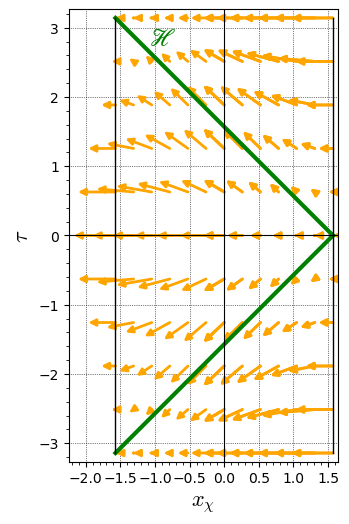

In [44]:
graph = k.plot(X2, ambient_coords=(x_ch, ta), mapping=Phi,
               fixed_coords={th: pi/2}, parameters={l: 1},
               ranges={ta: (-pi, pi)}, number_values={ta: 11, ch: 7, ph: 3},
               color='orange', scale=0.3, arrowsize=2)
graph += graph_hor
graph += line([(-pi/2, -pi), (-pi/2, pi)], color='black')
graph += line([(pi/2, -pi), (pi/2, pi)], color='black')
show(graph, frame=True, gridlines=True, figsize=8, aspect_ratio=1)

We note that, graphically, $k$ appears tangent to $\mathscr{H}$, in agreement with $\mathscr{H}$ being a null hypersurface (the only kind of hypersurface for which the normal is also tangent to the hypersurface).

The spacetime metric $g$ restricted to $\mathscr{H}$ is evaluated by means of the method `along`:

In [45]:
g_H = H.lorentzian_metric('g_H', latex_name=r'\left.g\right|_{\mathscr{H}}', 
                          dest_map=F)
g_H.set(g.along(F))
print(g_H)

Lorentzian metric g_H along the 3-dimensional differentiable submanifold H embedded in the 4-dimensional Lorentzian manifold M with values on the 4-dimensional Lorentzian manifold M


In [46]:
g_H.display()

g_H = -l^2/cos(ch)^2 dta⊗dta + l^2/cos(ch)^2 dch⊗dch + l^2*sin(ch)^2/cos(ch)^2 dth⊗dth + l^2*sin(ch)^2*sin(th)^2/cos(ch)^2 dph⊗dph

The vector field $k$ restricted to $\mathscr{H}$:

In [47]:
k_H = k.along(F)
k_H.set_name('k_H', latex_name=r'\left.k\right|_{\mathscr{H}}')
print(k_H)

Vector field k_H along the 3-dimensional differentiable submanifold H embedded in the 4-dimensional Lorentzian manifold M with values on the 4-dimensional Lorentzian manifold M


In [48]:
k_H.display()

k_H = sqrt(cos(ph)*sin(ch)*sin(th) + 1)*sqrt(-cos(ph)*sin(ch)*sin(th) + 1)*cos(ch)/l ∂/∂ta - cos(ch)^2*cos(ph)*sin(th)/l ∂/∂ch - cos(ch)*cos(ph)*cos(th)/(l*sin(ch)) ∂/∂th + cos(ch)*sin(ph)/(l*sin(ch)*sin(th)) ∂/∂ph

Check that $\left.k\right|_{\mathscr{H}}$ is a null vector field:

In [49]:
g_H(k_H, k_H).expr()

0

Since $\left.k\right|_{\mathscr{H}}$ is normal to $\mathscr{H}$, we recover the fact that $\mathscr{H}$ is a null hypersurface. 

### Killing horizon character 

The Killing vector field $\xi$ restricted to $\mathscr{H}$:

In [50]:
xi_H = xi.along(F)
xi_H.set_name('xi_H', latex_name=r'\left.\xi\right|_{\mathscr{H}}')
print(xi_H)

Vector field xi_H along the 3-dimensional differentiable submanifold H embedded in the 4-dimensional Lorentzian manifold M with values on the 4-dimensional Lorentzian manifold M


In [51]:
xi_H.display()

xi_H = -(cos(ph)^2*sin(ch)^2*sin(th)^2 - 1)/l ∂/∂ta - sqrt(cos(ph)*sin(ch)*sin(th) + 1)*sqrt(-cos(ph)*sin(ch)*sin(th) + 1)*cos(ch)*cos(ph)*sin(th)/l ∂/∂ch - sqrt(cos(ph)*sin(ch)*sin(th) + 1)*sqrt(-cos(ph)*sin(ch)*sin(th) + 1)*cos(ph)*cos(th)/(l*sin(ch)) ∂/∂th + sqrt(cos(ph)*sin(ch)*sin(th) + 1)*sqrt(-cos(ph)*sin(ch)*sin(th) + 1)*sin(ph)/(l*sin(ch)*sin(th)) ∂/∂ph

Value of $\tau$ on $\mathscr{H}$:

In [52]:
ta_H = F.expr()[0]
ta_H

arccos(cos(ph)*sin(ch)*sin(th))

We check that
$ \xi \stackrel{\mathscr{H}}{=} \frac{\sin\tau}{\cos\chi} \, k $:

In [53]:
xi_H == sin(ta_H)/cos(ch)*k_H

True

Hence, on $\mathscr{H}$, the Killing vector $\xi$ is normal to $\mathscr{H}$. 
$\mathscr{H}$ being a null hypersurface, this implies that $\mathscr{H}$ **is a Killing horizon**.

As a consequence, $\xi$ must be a null vector on $\mathscr{H}$. We can check this property by computing the scalar square of $\xi$ in all $\mathscr{M}$:

In [54]:
xi2 = g(xi, xi)
xi2.display()

g(xi,xi): M → ℝ
   (ta, ch, th, ph) ↦ -(cos(ph)^2*sin(ch)^2*sin(th)^2 - 2*cos(ph)*cos(ta)*sin(ch)*sin(th) - sin(ta)^2 + 1)/cos(ch)^2
on MP: (t, x, y, u) ↦ -u^2/l^2

and notice that it is equal to $-u^2/\ell^2$:

In [55]:
xi2 == - U^2/l^2

True

so that $\xi$ is null on $\mathscr{H}$ as a direct consequence of the vanishing of $u$ on $\mathscr{H}$. Incidentally, the above formula implies that the Killing vector $\xi$ is timelike everywhere on the AdS spacetime, except on the Poincaré horizon, where it is null. 

## Degenerate character of the Killing horizon $\mathscr{H}$ 

The **non-affinity coefficient** $\kappa$ of $\xi$ on $\mathscr{H}$ is defined by $\nabla_\xi \xi \stackrel{\mathscr{H}}{=} \kappa \xi$. To compute $\kappa$, we first compute the "acceleration" vector
$\nabla_\xi \xi$:

In [56]:
acc = nabla(xi).contract(xi)
acc.display()

-(cos(ph)*sin(ch)*sin(ta)*sin(th) - cos(ta)*sin(ta))/l^2 ∂/∂ta - (cos(ph)^2*cos(th)^2*sin(ch)*sin(ta)^2 - cos(ph)^2*cos(ta)^2*sin(ch)*sin(th)^2 + sin(ch)*sin(ph)^2*sin(ta)^2 - (cos(ch)^2 - 2)*cos(ph)*cos(ta)*sin(th) - sin(ch))/(l^2*cos(ch)) ∂/∂ch + (cos(ph)^2*cos(th)*sin(ch)*sin(th) - cos(ph)*cos(ta)*cos(th))/(l^2*sin(ch)) ∂/∂th - (cos(ph)*sin(ch)*sin(ph)*sin(th) - cos(ta)*sin(ph))/(l^2*sin(ch)*sin(th)) ∂/∂ph

and subsquently evaluate it on $\mathscr{H}$:

In [57]:
acc.along(F).display()

0

Hence we get $\kappa = 0$, so that the Poincaré horizon $\mathscr{H}$ is a **degenerate Killing horizon**. 

Note that $\kappa = 0$ can also be obtained via the formula
$$\mathrm{d}(\xi\cdot\xi) \stackrel{\mathscr{H}}{=} -2 \kappa  \underline{\xi} . $$
which holds for any Killing horizon. The left hand side is computed as

In [58]:
dxi2 = diff(xi2)
dxi2.display()

dg(xi,xi) = -2*(cos(ph)*sin(ch)*sin(ta)*sin(th) - cos(ta)*sin(ta))/cos(ch)^2 dta - 2*(cos(ph)^2*sin(ch)*sin(th)^2 + (cos(ch)^2 - 2)*cos(ph)*cos(ta)*sin(th) + cos(ta)^2*sin(ch))/cos(ch)^3 dch - 2*(cos(ph)^2*cos(th)*sin(ch)^2*sin(th) - cos(ph)*cos(ta)*cos(th)*sin(ch))/cos(ch)^2 dth + 2*(cos(ph)*sin(ch)^2*sin(ph)*sin(th)^2 - cos(ta)*sin(ch)*sin(ph)*sin(th))/cos(ch)^2 dph

The restriction of this 1-form to $\mathscr{H}$ is computed by means of the method `along`:

In [59]:
dxi2_H = dxi2.along(F)
print(dxi2_H)

1-form dg(xi,xi) along the 3-dimensional differentiable submanifold H embedded in the 4-dimensional Lorentzian manifold M with values on the 4-dimensional Lorentzian manifold M


In [60]:
dxi2_H.display()

dg(xi,xi) = 0

Hence $\mathrm{d}(\xi\cdot\xi) \stackrel{\mathscr{H}}{=} 0$ and we recover $\kappa=0$.